**Data Overview**

The dataset used in this project comprises transaction records from a retail environment, capturing customer purchases over a specific period. Each record details the customer's interaction with the product offerings, providing a rich source of information for analysis.
Attributes
Member Number: A unique identifier for each customer.
Date: The date on which each transaction occurred.
Item Description: Describes the product purchased in each transaction.
Size and Scope
Total Records: 38,765 entries, representing individual purchase actions.
Coverage: The dataset spans multiple product categories and includes data from various geographic locations, offering a comprehensive view of the customer base.

In [ ]:
import pandas as pd

file_path = "Basket_dataset(1).csv"
df = pd.read_csv(file_path)

df.head()


,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk


**Data Understanding**

Before initiating the data distribution analysis, it was essential to preprocess and clean the
dataset to ensure accuracy in the subsequent steps. The process began with a thorough examination
of the dataset, including an overview of column names, data types, and the count of non-null values.
To simplify the data handling, I renamed the 'Member_Number' and 'ItemDescription' columns to
'memberID' and 'itemName', respectively

In [ ]:
df.columns = ['memberID', 'Date', 'itemName']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   memberID  38765 non-null  int64 
 1   Date      38765 non-null  object
 2   itemName  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
print(df.dtypes)


memberID     int64
Date        object
itemName    object
dtype: object


**Management of missing values and suitable transformations of variables:**

An initial check for missing values revealed that there were none, as indicated in the attached
figure. Additionally, data types for certain columns were converted for appropriate analysis: the 'Date'
column was changed from an object type to a date format, and 'itemName' was converted to a string
format,

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

print("Missing Values:\n")
print(missing_values)


Missing Values:

memberID    0
Date        0
itemName    0
dtype: int64


In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Convert 'itemDescription' column to string type
df['itemName'] = df['itemName'].astype('string')
print(df.dtypes)


memberID             int64
Date        datetime64[ns]
itemName    string[python]
dtype: object


In [ ]:
df[df.duplicated()].sort_values('memberID')


,memberID,Date,itemName
37649,1003,2014-02-27,rolls/buns
31248,1005,2014-01-09,rolls/buns
8488,1006,2015-06-14,frankfurter
21210,1008,2015-07-21,yogurt
20918,1026,2015-05-28,root vegetables
...,...,...,...
24876,4968,2014-03-04,beef
18312,4981,2015-01-10,margarine
24043,4981,2015-01-10,margarine
24258,4988,2015-10-29,rolls/buns


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,memberID,Date,itemName
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk
...,...,...,...
38760,4471,2014-10-08,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-12-03,fruit/vegetable juice


In [ ]:
# Check unique values in 'itemDescription' column
unique_values = df['itemName'].unique()
print(unique_values)

<StringArray>
[       'tropical fruit',            'whole milk',             'pip fruit',
      'other vegetables',            'rolls/buns',            'pot plants',
          'citrus fruit',                  'beef',           'frankfurter',
               'chicken',
 ...
        'flower (seeds)',                  'rice',                   'tea',
        'salad dressing',  'specialty vegetables',        'pudding powder',
           'ready soups',       'make up remover',        'toilet cleaner',
 'preservation products']
Length: 167, dtype: string


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   memberID  38006 non-null  int64         
 1   Date      38006 non-null  datetime64[ns]
 2   itemName  38006 non-null  string        
dtypes: datetime64[ns](1), int64(1), string(1)
memory usage: 1.2 MB


**Distribution Analysis and statistical exploration with visualisation**

The initial exploration of the dataset unveiled key distribution properties of the transactional
data, providing a foundation for deeper analysis. To assess the distribution, I conducted value counts
across various columns, which helped determine the volume of transactions per member, the top
purchased products, and the days most likely to see transactions. This analysis sets the stage for
more detailed visual evaluations, including:
● The frequency distribution of item purchases.
● The number of items purchased per member.
● The distribution of transactions over time.
In the realm of statistical exploration, I performed basic statistics on 'memberID' and
'itemName'. This analysis provided insights into the most frequently purchased items, the number of
unique items, and standard deviation among other statistics for these categorical variables.
Additionally, I assessed numerical variables to derive basic statistical metrics

In [ ]:
# Distribution analysis for Member_number
member_number_counts = df['memberID'].value_counts()
print("Distribution analysis for Member_number:")
print(member_number_counts)

# Distribution analysis for itemDescription
item_description_counts = df['itemName'].value_counts()
print("\nDistribution analysis for itemDescription:")
print(item_description_counts)

# Distribution analysis for Date
date_counts = df['Date'].value_counts()
print("\nDistribution analysis for Date:")
print(date_counts)



Distribution analysis for Member_number:
memberID
3180    35
3737    33
3050    32
2051    31
3915    30
        ..
4816     1
4029     1
4151     1
4565     1
2640     1
Name: count, Length: 3898, dtype: int64

Distribution analysis for itemDescription:
itemName
whole milk               2363
other vegetables         1827
rolls/buns               1646
soda                     1453
yogurt                   1285
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: Int64

Distribution analysis for Date:
Date
2015-01-21    96
2015-07-21    91
2015-08-08    90
2014-08-28    87
2015-11-29    87
              ..
2014-01-10    24
2014-07-04    24
2015-03-17    23
2015-09-01    22
2015-03-16    22
Name: count, Length: 728, dtype: int64


In [ ]:
# Calculate basic statistics for the numerical data
numerical_stats = df['memberID'].describe()

# Categorical data statistics for 'itemName'
categorical_stats = df['itemName'].describe()

numerical_stats, categorical_stats


(count    38006.000000
 mean      3003.361390
 std       1153.659151
 min       1000.000000
 25%       2001.000000
 50%       3005.000000
 75%       4007.000000
 max       5000.000000
 Name: memberID, dtype: float64,
 count          38006
 unique           167
 top       whole milk
 freq            2363
 Name: itemName, dtype: object)

**Data visualisation**


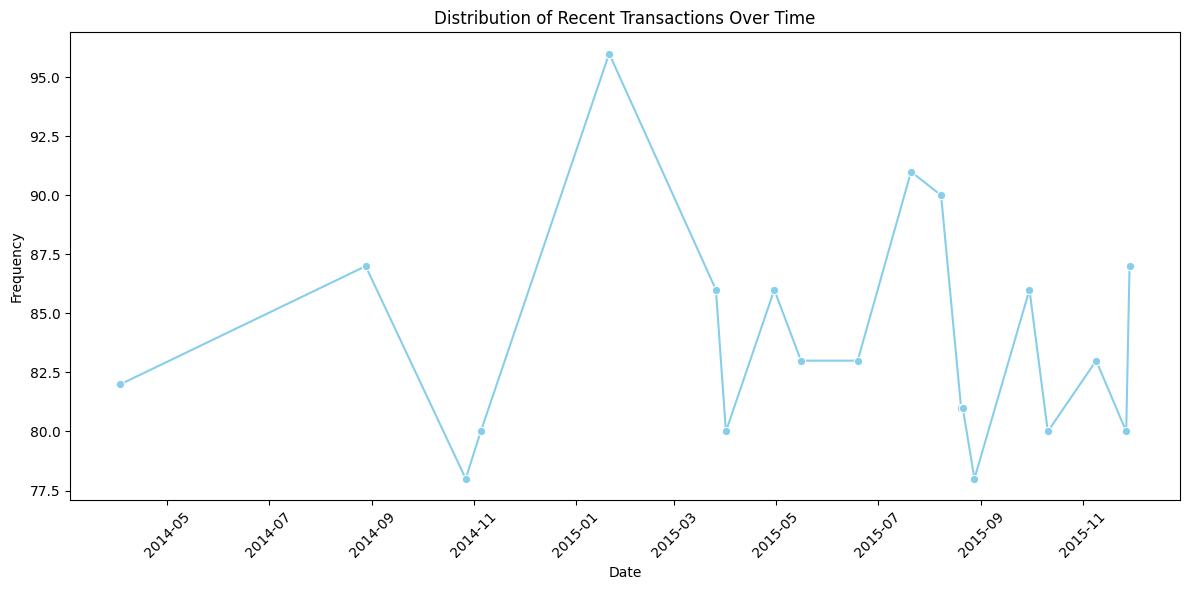

<ipython-input-14-0931190ad587>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')


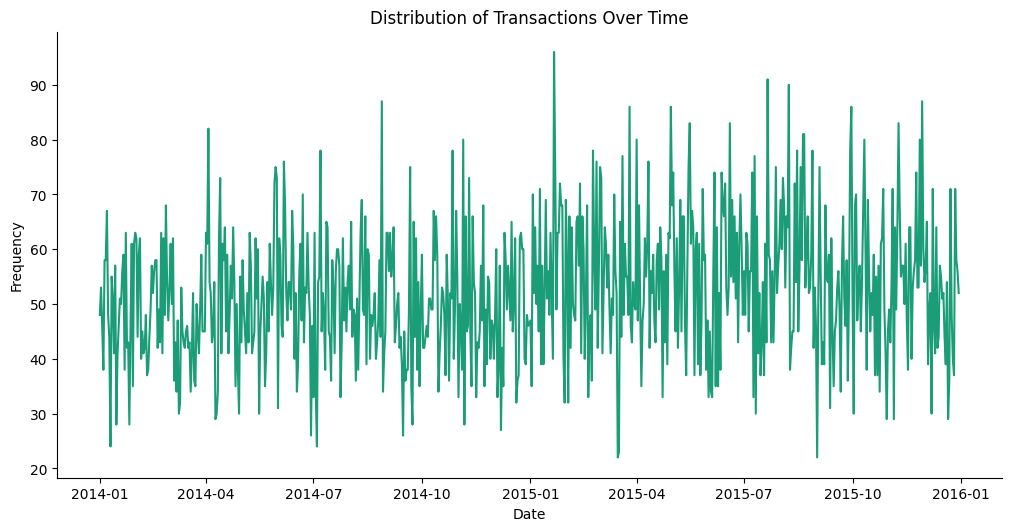

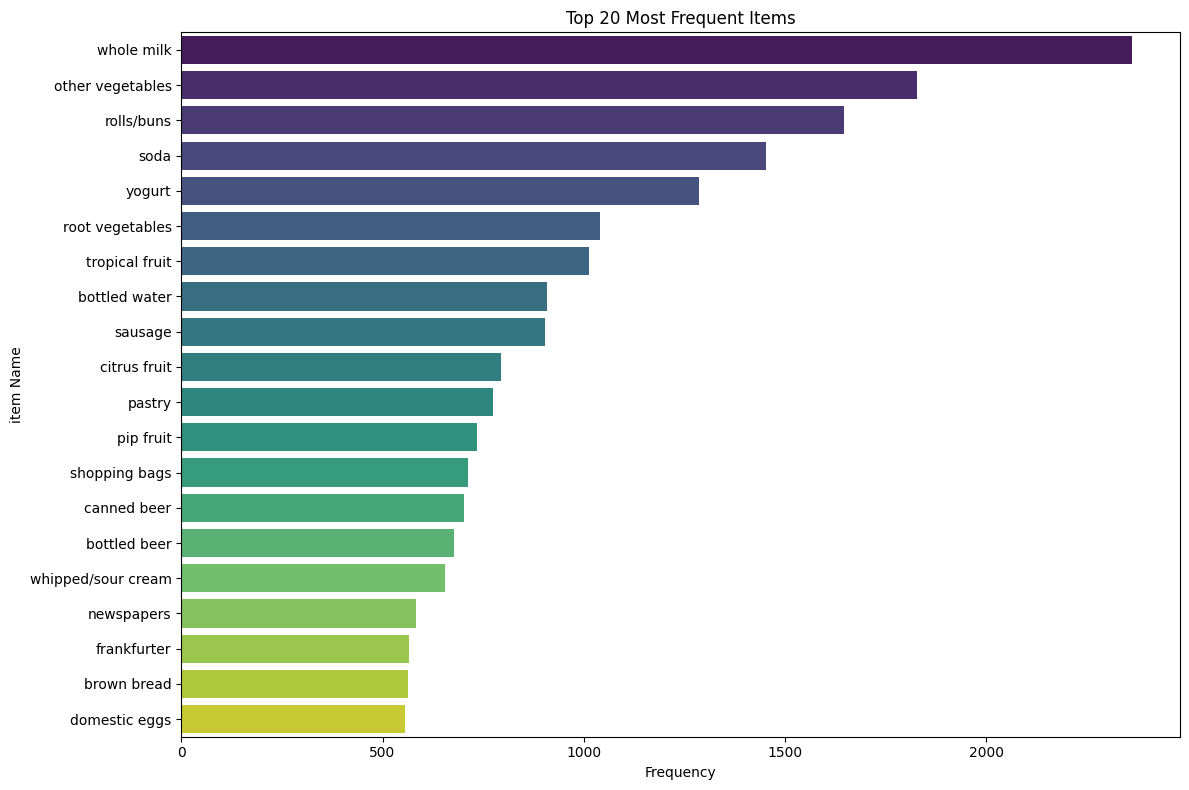

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the last 20 distinct dates and sort them chronologically
recent_dates = df['Date'].value_counts().sort_values().index[-20:]

# Filter the DataFrame to include only transactions from these dates
recent_transactions = df[df['Date'].isin(recent_dates)]

# Count the frequency of transactions for each date
transaction_counts = recent_transactions['Date'].value_counts().sort_index()

# Plot line plot for recent transactions over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=transaction_counts.index, y=transaction_counts.values, marker='o', color='skyblue')
plt.title('Distribution of Recent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='Frequency')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['Frequency']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Frequency')
plt.title('Distribution of Transactions Over Time')

# Plot bar plot for itemDescription
plt.figure(figsize=(12, 8))
top_items = df['itemName'].value_counts().head(20)
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 20 Most Frequent Items')
plt.xlabel('Frequency')
plt.ylabel('item Name')
plt.tight_layout()
plt.show()


In [ ]:
top_selling_items = top_items.head(10)
print("Top Selling Items:\n", top_selling_items)


Top Selling Items:
 itemName
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: Int64


In [ ]:
# Calculate descriptive statistics for count of transactions per member
transaction_counts_per_member = df['memberID'].value_counts()
statistics = transaction_counts_per_member.describe()
print("Descriptive Statistics for Count of Transactions per Member:\n")
print(statistics)


Descriptive Statistics for Count of Transactions per Member:

count    3898.000000
mean        9.750128
std         5.185020
min         1.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        35.000000
Name: count, dtype: float64


**Distribution of purchased items per member**

The histogram shows the
distribution of the number of
purchases per member, with
some statistics to provide
further insights:
● Mean: On average,
each member made about
9.75 purchases.
● Standard Deviation:
The standard deviation
is*slightly lower at 5.19,
indicating a bit less variability
in shopping frequency among
members.
● Minimum: The
minimum number of purchases
by a member is 1.
● 25th Percentile (Q1): 25% of the members made 6 or fewer purchases.
● Median (50th Percentile): The median remains at 9 purchases, indicating that half of the
members made up to 9 purchases.
● 75th Percentile (Q3): 75% of the members made 13 or fewer purchases.
● Maximum: The maximum number of purchases by a member is 35.


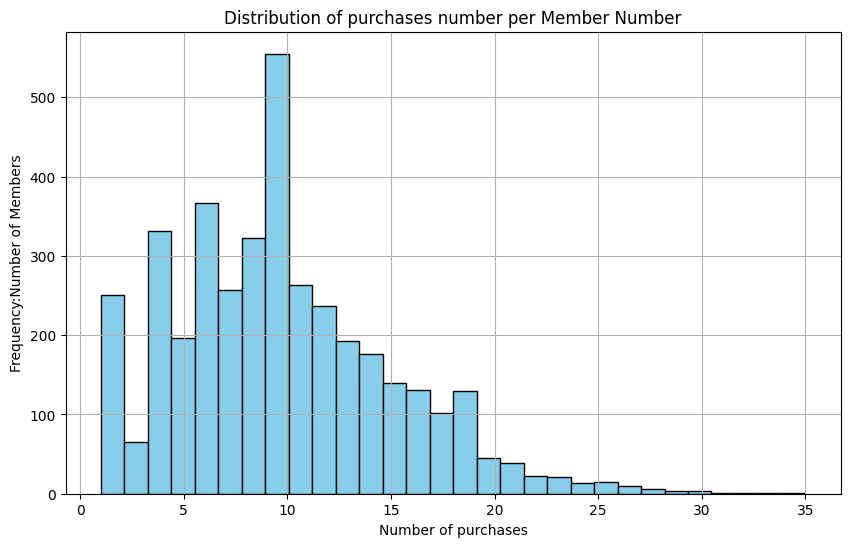

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of transaction counts per member number
plt.figure(figsize=(10, 6))
plt.hist(df['memberID'].value_counts(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of purchases number per Member Number')
plt.xlabel('Number of purchases')
plt.ylabel('Frequency:Number of Members')
plt.grid(True)
plt.show()


In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek


In [ ]:
df['Day_Name'] = df['Date'].dt.strftime('%A')

# Group by month and day name and count the transactions
transaction_counts_by_month = df.groupby('Month')['memberID'].count()
transaction_counts_by_day_name = df.groupby('Day_Name')['memberID'].count()

# Find the month and day with the highest transaction counts
month_with_max_transactions = transaction_counts_by_month.idxmax()
day_with_max_transactions = transaction_counts_by_day_name.idxmax()

print("Month with the highest transaction count:", month_with_max_transactions)
print("Day of the week with the highest transaction count:", day_with_max_transactions)

Month with the highest transaction count: 8
Day of the week with the highest transaction count: Thursday


In [ ]:
import plotly.express as px


Sales_weekly = df.resample('w', on='Date').size()
fig = px.line(df, x=Sales_weekly.index, y=Sales_weekly,
              labels={'y': 'Number of Sales',
                     'x': 'Date'})
fig.update_layout(title_text='Number of Sales Weekly',
                  title_x=0.5, title_font=dict(size=18))
fig.show()



**The number of items purchased per member**

This tree map represents the sales frequency of various items, with the most popular items like
'whole milk' and 'other vegetables' occupying prominently larger blocks

In [ ]:
Frequency_of_items = df.groupby(pd.Grouper(key='itemName')).size().reset_index(name='count')
fig = px.treemap(Frequency_of_items, path=['itemName'], values='count')
fig.update_layout(title_text='Frequency of the Items Sold',
                  title_x=0.5, title_font=dict(size=18)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

**Monthly products sold over 2014-2015:**

The figure presents a side-by-side comparison of the number of products sold each month
across the two consecutive years. Notably, there appears to be a seasonal pattern, with certain
months showing a higher volume of sales, such as August, which likely coincides with holiday
shopping. The year 2015 shows a general increase in the number of products sold in comparison to 2014, suggesting a positive trend in sales volume over the year. This could be indicative of successful marketing strategies.


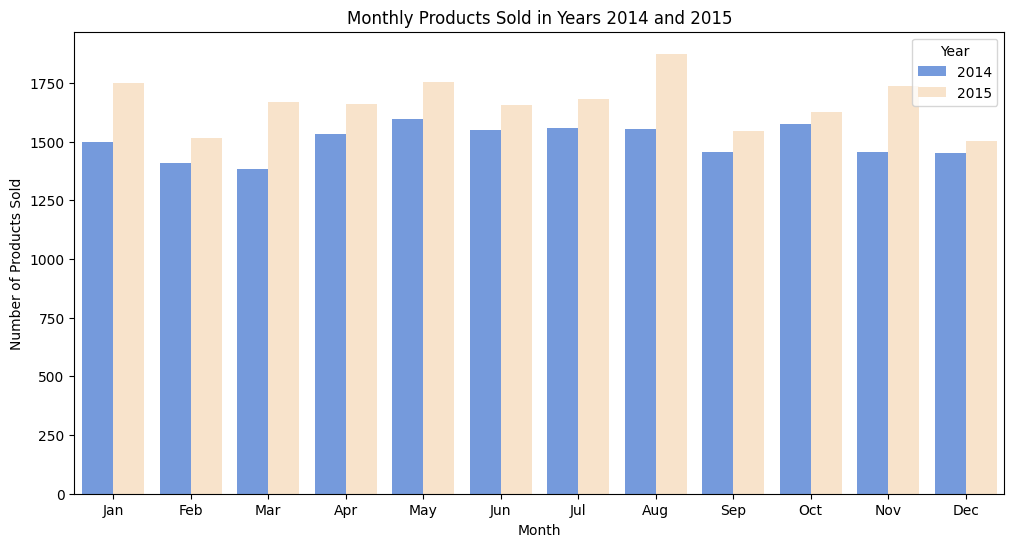

In [ ]:
import seaborn as sns

# Filter data for 2014 and 2015 based on 'Year' column
data_2014 = df[df['Year'] == 2014]
data_2015 = df[df['Year'] == 2015]

# Group by month and count entries for each year
monthly_sales_2014 = data_2014.groupby('Month').size().reset_index(name='count')
monthly_sales_2015 = data_2015.groupby('Month').size().reset_index(name='count')

monthly_sales_2014['Year'] = 2014
monthly_sales_2015['Year'] = 2015

combined_sales = pd.concat([monthly_sales_2014, monthly_sales_2015])

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_sales, x='Month', y='count', hue='Year', palette=['cornflowerblue', 'bisque'])
plt.title('Monthly Products Sold in Years 2014 and 2015')
plt.xlabel('Month')
plt.ylabel('Number of Products Sold')
plt.legend(title='Year')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
df

,memberID,Date,itemName,Year,Month,Day,Day_of_week,Day_Name
0,1808,2015-07-21,tropical fruit,2015,7,21,1,Tuesday
1,2552,2015-01-05,whole milk,2015,1,5,0,Monday
2,2300,2015-09-19,pip fruit,2015,9,19,5,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,5,Saturday
4,3037,2015-02-01,whole milk,2015,2,1,6,Sunday
...,...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,2014,10,8,2,Wednesday
38761,2022,2014-02-23,candy,2014,2,23,6,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,2,Wednesday
38763,1510,2014-12-03,fruit/vegetable juice,2014,12,3,2,Wednesday


**Number of Purchases Across Weekdays**

We observe the distribution of purchase transactions across the days of
the week. The pattern exhibited shows that Thursday is the busiest shopping day, with the number of
purchases peaking noticeably. The least number of purchases occur on Monday, which may be an
opportunity to implement special promotions or marketing efforts to increase traffic on this
underperforming day.


<ipython-input-32-ba8a968d8fc9>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




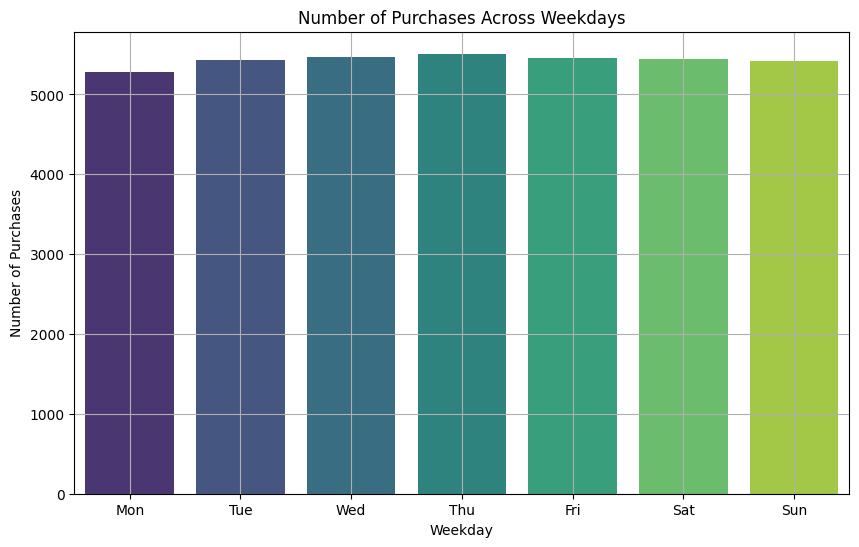

In [ ]:
# Create a frequency table of weekdays from the dataset
weekday_counts = df['Day_of_week'].value_counts().sort_index()

# Convert index to day names for clarity
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_counts.index = weekday_names

# Creating a bar chart for purchases across weekdays
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='viridis')
plt.title('Number of Purchases Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.show()


**The distribution of customers by quantity purchased**

It is immediately noticeable that for most customers, the quantity purchased in 2015 exceeds
that of 2014, which may suggest increased customer retention and loyalty, or possibly an expansion in
product offerings that has resonated with these customers

<Figure size 1400x800 with 0 Axes>

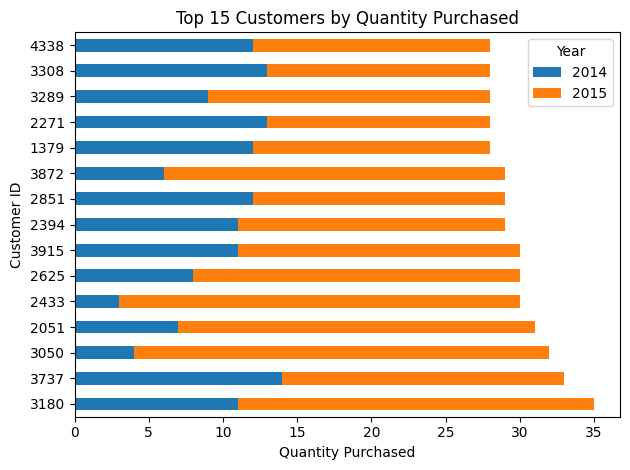

In [ ]:
# Count the number of purchases for each customer per year
df_grouped = df.groupby(['memberID', 'Year']).size().reset_index(name='Quantity')

# Get the total quantity purchased per customer
df_total = df_grouped.groupby('memberID')['Quantity'].sum().reset_index()

# Find the top 15 customers based on the total quantity purchased
top_customers = df_total.nlargest(15, 'Quantity')['memberID']

# Filter the original grouped dataframe to only include these top customers
df_top_customers = df_grouped[df_grouped['memberID'].isin(top_customers)]

# Pivot the data to have years as columns
df_pivot = df_top_customers.pivot(index='memberID', columns='Year', values='Quantity').fillna(0)

# Sort the customers by the total quantity purchased in descending order
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot.sort_values('Total', ascending=False, inplace=True)
df_pivot.drop(columns='Total', inplace=True)

plt.figure(figsize=(14, 8))
colors = ['#1f77b4', '#ff7f0e'] # Colors for each year
df_pivot.plot(kind='barh', stacked=True, color=colors, legend='reverse')

plt.xlabel('Quantity Purchased')
plt.ylabel('Customer ID')
plt.title('Top 15 Customers by Quantity Purchased')
plt.legend(title='Year')

plt.tight_layout()
plt.show()

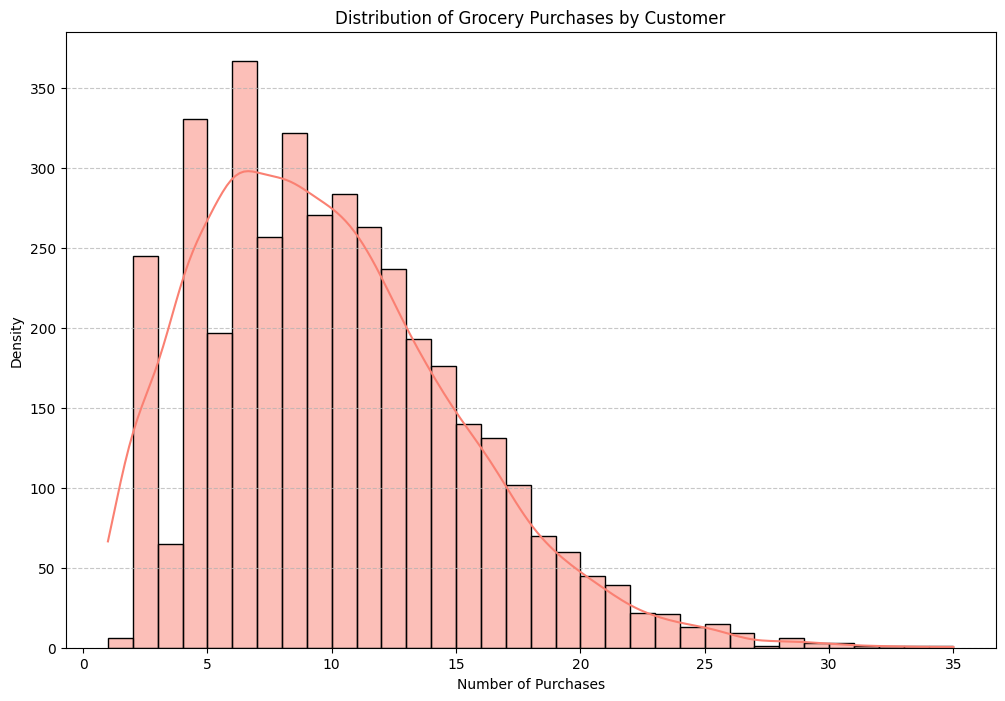

In [ ]:
# Calculate total purchases per customer
purchases_per_customer = df.groupby('memberID').size()

# Plot the distribution of grocery purchases per customer
plt.figure(figsize=(12, 8))
sns.histplot(purchases_per_customer, kde=True, color='salmon', binwidth=1)

# Plot formatting
plt.title('Distribution of Grocery Purchases by Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

**RFM Analysis Model**
As part of the project, an RFM (Recency, Frequency, Monetary) model has been developed to evaluate customer value. The SQL query provided effectively assigns each member with these critical values based on their transaction history. The 'Recency' column denotes the number of days since the last purchase, offering insight into customer engagement levels. 'Frequency' reflects the number of distinct shopping days, indicating customer loyalty and the habit of repeat purchases. 'Monetary' represents the total number of transactions, which serves as a proxy for the money spent by each member.

In [ ]:
import sqlite3

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

df.to_sql('transactions', conn, index=False, if_exists='replace', dtype={
    'memberID': 'INTEGER',
    'Date': 'TEXT',
    'itemName': 'TEXT'
})

rfm_query = """
WITH LastPurchaseDate AS (
    SELECT MAX(julianday(Date)) as MaxDate FROM transactions
)
SELECT
    t.memberID AS CustomerID,
    MAX(Date) AS LastPurchaseDate,
    CAST((SELECT MaxDate FROM LastPurchaseDate) - MAX(julianday(t.Date)) AS INTEGER) AS Recency, -- Days since last purchase from the last date in dataset
    COUNT(DISTINCT t.Date) AS Frequency, -- Visit frequency: distinct days with purchases
    COUNT(*) AS Monetary -- Total number of transactions
FROM
    transactions t
GROUP BY
    t.memberID
ORDER BY
    t.memberID;


"""

rfm_results = pd.read_sql_query(rfm_query, conn)

rfm_results


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,1000,2015-11-25 00:00:00,35,5,13
1,1001,2015-05-02 00:00:00,242,5,12
2,1002,2015-08-30 00:00:00,122,4,8
3,1003,2015-02-10 00:00:00,323,4,7
4,1004,2015-12-02 00:00:00,28,8,21
...,...,...,...,...,...
3893,4996,2015-11-24 00:00:00,36,3,10
3894,4997,2015-12-27 00:00:00,3,2,6
3895,4998,2015-10-14 00:00:00,77,1,2
3896,4999,2015-12-26 00:00:00,4,6,16


The table is a result of the RFM segmentation model executed via SQL, which assigns each customer
with Recency, Frequency, and Monetary values based on their purchase history. This table includes:
● LastPurchaseDate: The date of the most recent purchase made by the customer.
● Recency: The number of days between the last purchase date in the dataset and the last
purchase date for each customer. It indicates how recently each customer has made a
purchase.
● Frequency: The number of distinct shopping days, signifying how often each customer
shops.
● Monetary: The total number of transactions made by each customer, which can be a proxy
for the total spend.
This RFM table provides a comprehensive snapshot of customer engagement and purchasing
behaviour, serving as a foundational tool for personalised marketing strategies, customer lifecycle
analysis, and tailored customer engagement programs. The recency and frequency information can
help identify loyal customers, while the monetary value helps in recognizing the top spenders.

In [ ]:
rfm_results.to_csv('rfmtable.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
fig = px.histogram(rfm_results, x='Recency', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Recency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [ ]:
fig = px.histogram(rfm_results, x='Frequency', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Visit Frequency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [ ]:
fig = px.histogram(rfm_results, x='Monetary', opacity=0.85, marginal='box',
                   labels={'itemName': 'Monetary'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Monetary Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

**Customer segmentation with DBSCAN:**
Prior to the development of the DBSCAN model, it is crucial to standardise the dataset. This preprocessing step is necessary due to significant variations in the scales of different columns (Recency, Frequency, Monetary).




To effectively apply DBSCAN, selecting an appropriate value for epsilon (ε) is essential. Epsilon determines the maximum distance between two points for them to be considered as part of the same cluster. To identify the optimal value for ε, we employ the Nearest Neighbors approach

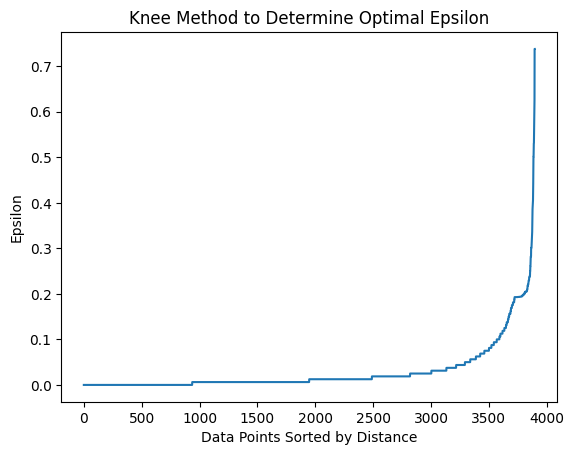

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_results[['Recency', 'Frequency', 'Monetary']])

# Find the optimal value for epsilon using the Nearest Neighbors approach
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(rfm_scaled)
distances, indices = neighbors_fit.kneighbors(rfm_scaled)

# Sort distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plotting the sorted distances to find the optimal epsilon
plt.plot(distances)
plt.title('Knee Method to Determine Optimal Epsilon')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Epsilon')
plt.show()

**choosing minPts:** A common heuristic is to set minPts to twice the number of dimensions in the dataset. Since we have three dimensions (Recency, Frequency, Monetary), we'll start with minPts = 6.





With the data standardised and the optimal epsilon determined(around 0.25), we can proceed to build and test the DBSCAN model, aiming for effective customer segmentation


In [ ]:
dbscan_estimated = DBSCAN(eps=0.25, min_samples=6)
clusters_estimated = dbscan_estimated.fit_predict(rfm_scaled)

# Add the estimated cluster labels to the dataframe
rfm_results['Estimated_Cluster'] = clusters_estimated

# Checking the distribution of estimated clusters and some descriptive statistics for each cluster
estimated_cluster_distribution = rfm_results['Estimated_Cluster'].value_counts()
estimated_cluster_stats = rfm_results.groupby('Estimated_Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

print(estimated_cluster_distribution)
print(estimated_cluster_stats)

Estimated_Cluster
 3    805
 1    757
 6    675
 0    543
 5    364
 4    342
 7    191
-1    132
 2     57
 8     26
 9      6
Name: count, dtype: int64
                      Recency  Frequency   Monetary
Estimated_Cluster                                  
-1                 187.833333   6.424242  19.166667
 0                 134.534070   5.000000  12.583794
 1                 155.866579   4.000000  10.170410
 2                  91.368421   8.000000  19.491228
 3                 196.939130   3.000000   7.608696
 4                 367.172515   1.000000   2.397661
 5                  94.692308   6.000000  15.049451
 6                 259.229630   2.000000   4.988148
 7                  79.031414   7.000000  17.329843
 8                  39.076923   9.000000  23.076923
 9                 157.833333   9.000000  22.166667


**Key Cluster Insights:**

● Clusters 0-9 show a variety of purchasing patterns:
○ Cluster 0: 543 customers, recent moderate purchasers.
○ Cluster 1: 757 customers, slightly less recent and average spenders.
○ Cluster 2: 57 customers, recent high-frequency and high-monetary spenders.
○ Cluster 3: The largest, with 805 customers, less recent, lower frequency and
spend.
○ Cluster 4: 342 customers, least recent, minimal spend.
○ Cluster 5 and 7: Similar profiles with moderate recency and higher spend.
○ Cluster 6: 675 customers, infrequent and low spend, not very recent.
○ Cluster 8 and 9: Smallest clusters, very high spenders and frequent buyers,
very recent (26,6 respectively).
● Outliers: More diverse behaviours, potentially very high or very low values in any of
the dimensions.


In [ ]:
!pip install squarify

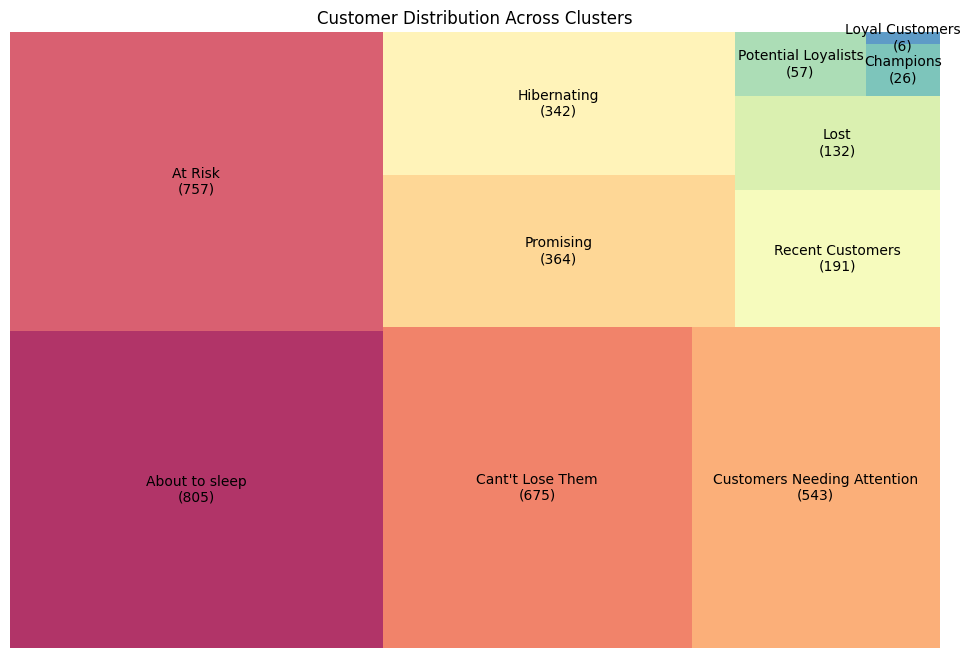

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify


cluster_to_segment = {
    0: 'Customers Needing Attention',
    1: 'At Risk',
    2: 'Potential Loyalists',
    3: 'About to sleep',
    4: 'Hibernating',
    5: 'Promising',
    6: "Cant't Lose Them",
    7: 'Recent Customers',
    8: 'Champions',
    9: 'Loyal Customers',
    -1: 'Lost'
}

cluster_distribution = rfm_results['Estimated_Cluster'].value_counts().rename(index=cluster_to_segment)

# Generate labels for each cluster, showing the cluster number and the count of customers in it
labels = [f'{idx}\n({count})' for idx, count in cluster_distribution.items()]

sizes = cluster_distribution.values

colors = [plt.cm.Spectral(i / float(len(labels))) for i in range(len(labels))]

# Create a squarify plot
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Customer Distribution Across Clusters')
plt.axis('off')  # Disable the axis for a cleaner look
plt.show()
